In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv('coronavirus_cases.csv',parse_dates=['Date'])
df

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0
...,...,...,...,...,...
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7


In [3]:
df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

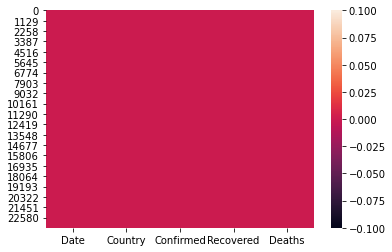

In [4]:
sns.heatmap(df.isnull())

# no null values are present in the dataset.

In [5]:
df.dtypes

Date         datetime64[ns]
Country              object
Confirmed             int64
Recovered             int64
Deaths                int64
dtype: object

In [7]:
df_dates=pd.DataFrame()
df_dates['month']=df['Date'].dt.month_name()
df_dates['year']=df['Date'].dt.year
df_dates['day']=df['Date'].dt.day_name()
df_dates

,month,year,day
0,January,2020,Wednesday
1,January,2020,Wednesday
2,January,2020,Wednesday
3,January,2020,Wednesday
4,January,2020,Wednesday
...,...,...,...
23683,May,2020,Tuesday
23684,May,2020,Tuesday
23685,May,2020,Tuesday
23686,May,2020,Tuesday


In [8]:
df_dates['type_of_day']=np.where((df_dates['day']=='Sunday')|(df_dates['day']=='Saturday'),'weekend','weekday')

In [9]:
df_dates

,month,year,day,type_of_day
0,January,2020,Wednesday,weekday
1,January,2020,Wednesday,weekday
2,January,2020,Wednesday,weekday
3,January,2020,Wednesday,weekday
4,January,2020,Wednesday,weekday
...,...,...,...,...
23683,May,2020,Tuesday,weekday
23684,May,2020,Tuesday,weekday
23685,May,2020,Tuesday,weekday
23686,May,2020,Tuesday,weekday


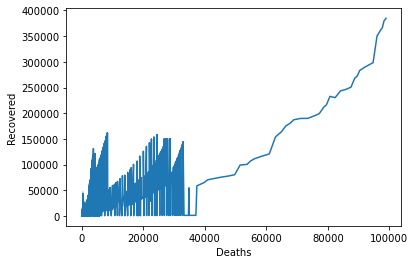

In [10]:
sns.lineplot(x='Deaths',y='Recovered',data=df)

this indicates that there is a gradual increase in the deaths in the ratio of recoveries also.

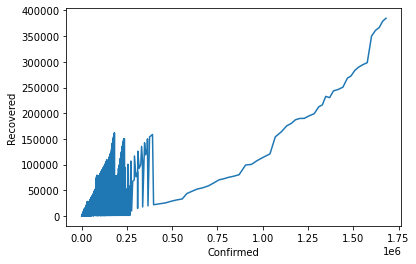

In [18]:
sns.lineplot(x='Confirmed',y='Recovered',data=df)

this relationship also indcates the same result as if people are getting confirmed with the virus, but they are also recovered from the same.

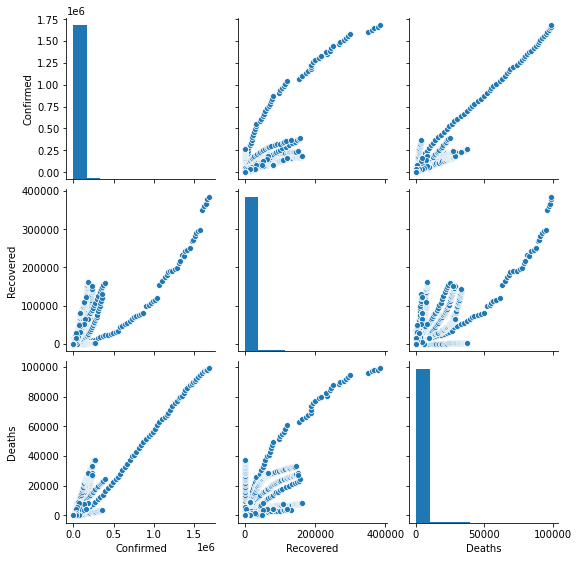

In [11]:
sns.pairplot(df)

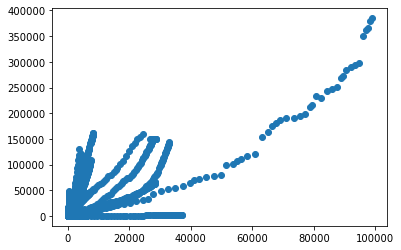

In [13]:
plt.scatter(x='Deaths',y='Recovered',data=df)

Confirmed       AxesSubplot(0.125,0.536818;0.352273x0.343182)
Recovered    AxesSubplot(0.547727,0.536818;0.352273x0.343182)
Deaths             AxesSubplot(0.125,0.125;0.352273x0.343182)
dtype: object

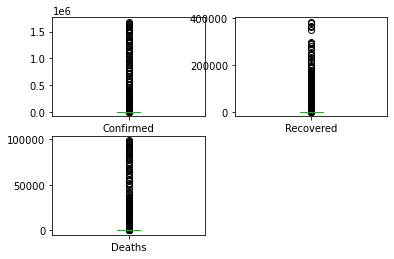

In [6]:
df.plot(kind='box',subplots=True,layout=(2,2))

In [7]:
df.skew()

Confirmed    18.674502
Recovered    10.662286
Deaths       14.218167
dtype: float64

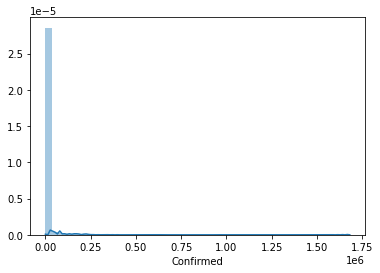

In [8]:
sns.distplot(df['Confirmed'])

In [9]:
df['Confirmed']=np.log1p(df['Confirmed'])

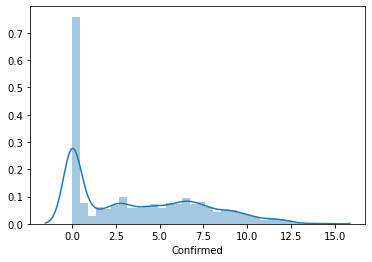

In [10]:
sns.distplot(df['Confirmed'])

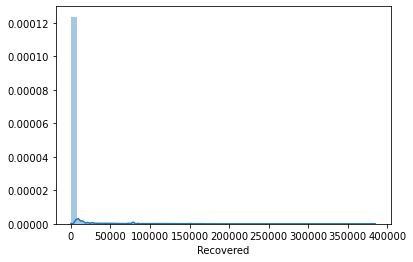

In [11]:
sns.distplot(df['Recovered'])

In [12]:
df['Recovered']=np.log1p(df['Recovered'])

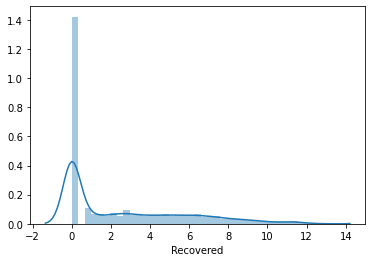

In [13]:
sns.distplot(df['Recovered'])

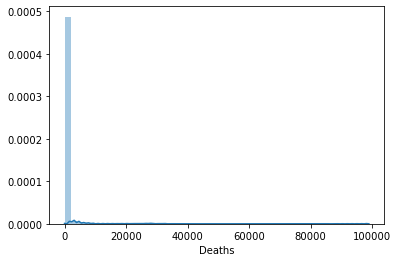

In [14]:
sns.distplot(df['Deaths'])

In [15]:
df['Deaths']=np.log1p(df['Deaths'])

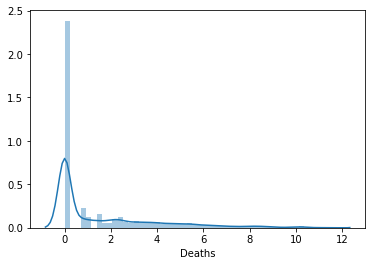

In [16]:
sns.distplot(df['Deaths'])

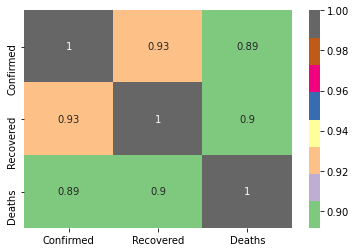

In [17]:
sns.heatmap(df.corr(),annot=True,cmap='Accent')

In [18]:
df

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0.000000,0.000000,0.000000
1,2020-01-22,Albania,0.000000,0.000000,0.000000
2,2020-01-22,Algeria,0.000000,0.000000,0.000000
3,2020-01-22,Andorra,0.000000,0.000000,0.000000
4,2020-01-22,Angola,0.000000,0.000000,0.000000
...,...,...,...,...,...
23683,2020-05-26,West Bank and Gaza,6.063785,5.902633,1.386294
23684,2020-05-26,Western Sahara,2.302585,1.945910,0.693147
23685,2020-05-26,Yemen,5.521461,2.397895,3.912023
23686,2020-05-26,Zambia,6.825460,5.820083,2.079442


In [19]:
df.drop(['Date'],axis=1,inplace=True)

In [20]:
df

,Country,Confirmed,Recovered,Deaths
0,Afghanistan,0.000000,0.000000,0.000000
1,Albania,0.000000,0.000000,0.000000
2,Algeria,0.000000,0.000000,0.000000
3,Andorra,0.000000,0.000000,0.000000
4,Angola,0.000000,0.000000,0.000000
...,...,...,...,...
23683,West Bank and Gaza,6.063785,5.902633,1.386294
23684,Western Sahara,2.302585,1.945910,0.693147
23685,Yemen,5.521461,2.397895,3.912023
23686,Zambia,6.825460,5.820083,2.079442


In [23]:
le=LabelEncoder()
df['Country']=le.fit_transform(df['Country'])
df

,Country,Confirmed,Recovered,Deaths
0,0,0.000000,0.000000,0.000000
1,1,0.000000,0.000000,0.000000
2,2,0.000000,0.000000,0.000000
3,3,0.000000,0.000000,0.000000
4,4,0.000000,0.000000,0.000000
...,...,...,...,...
23683,183,6.063785,5.902633,1.386294
23684,184,2.302585,1.945910,0.693147
23685,185,5.521461,2.397895,3.912023
23686,186,6.825460,5.820083,2.079442


In [24]:
df.describe()

,Country,Confirmed,Recovered,Deaths
count,23688.000000,23688.000000,23688.000000,23688.000000
mean,93.500000,3.702366,2.564483,1.603462
std,54.271303,3.599792,3.169000,2.390199
min,0.000000,0.000000,0.000000,0.000000
25%,46.750000,0.000000,0.000000,0.000000
50%,93.500000,2.944439,0.693147,0.000000
75%,140.250000,6.594413,4.820282,2.639057
max,187.000000,14.334848,12.860747,11.502006


observation: the std deviation is too much the data.
    the data is right side skewed as our mean is too much than our median.